In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Data=pd.read_excel('glass.xlsx', sheet_name='glass')
Data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
Data.shape

(214, 10)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
Data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
Data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Exploratory Data Analysis (EDA)

In [ ]:
#check the null values
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
Data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [ ]:
Data['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

# Data Visualization

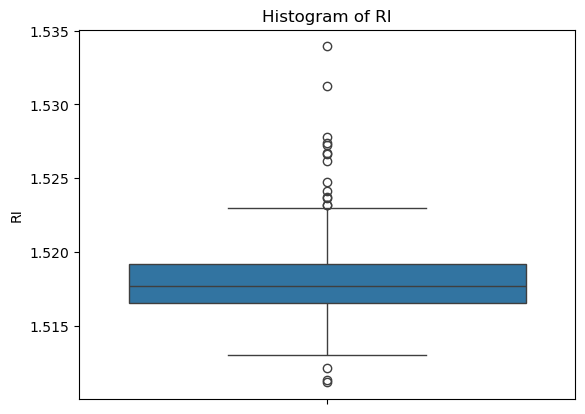

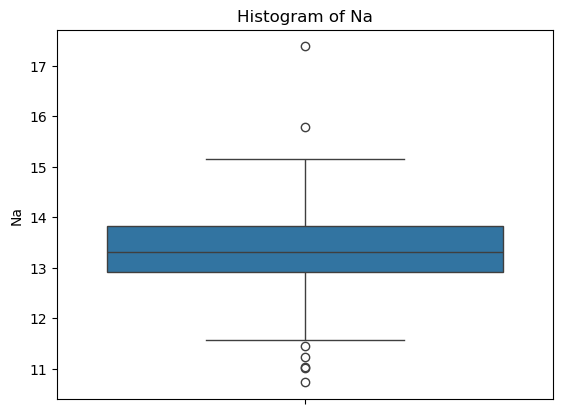

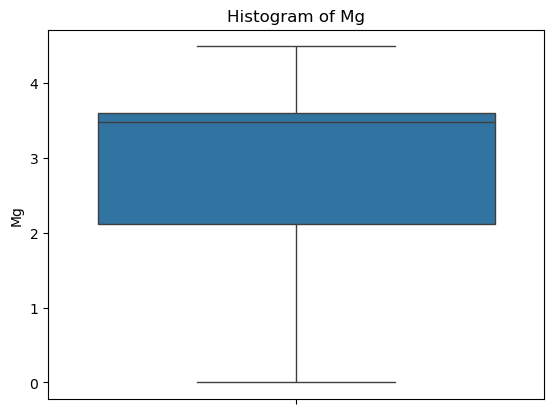

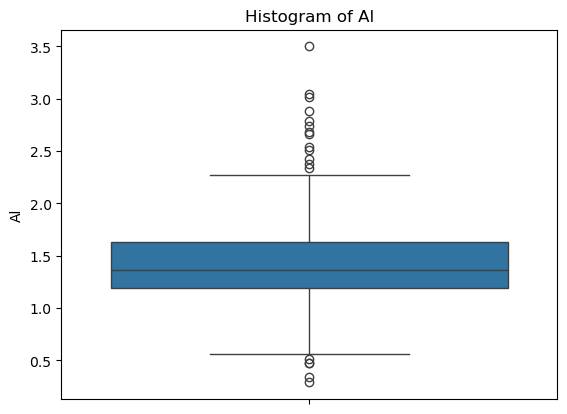

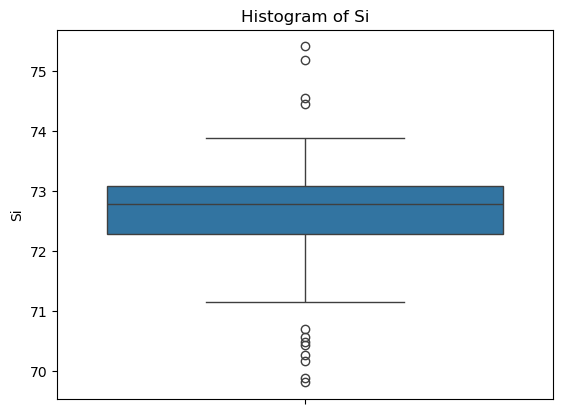

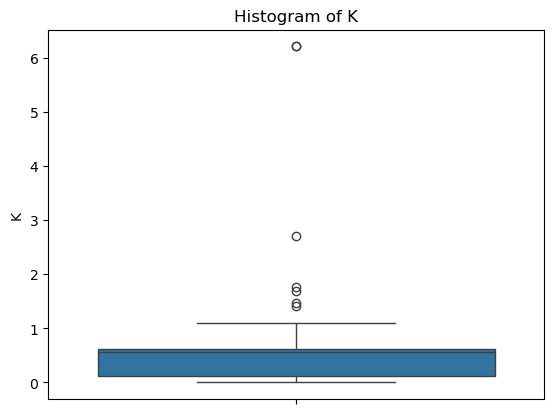

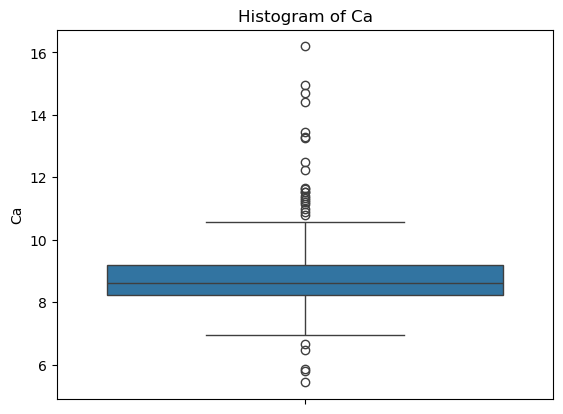

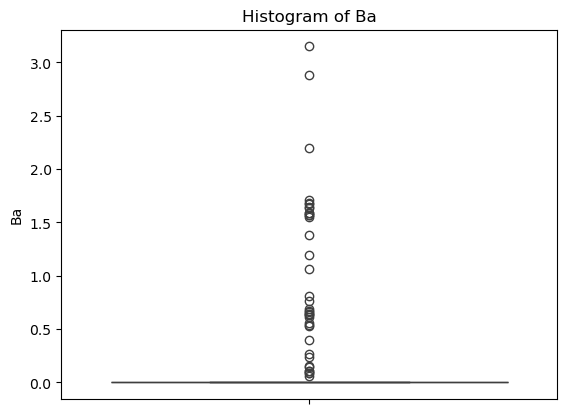

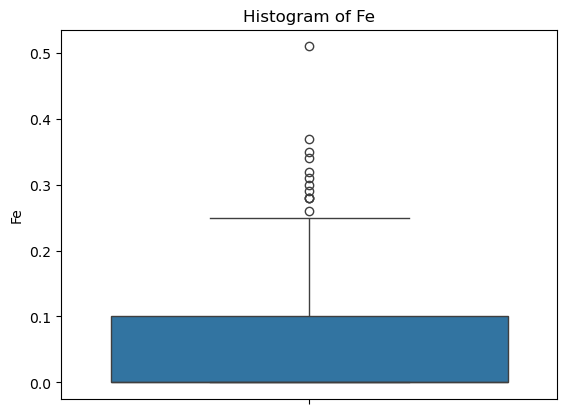

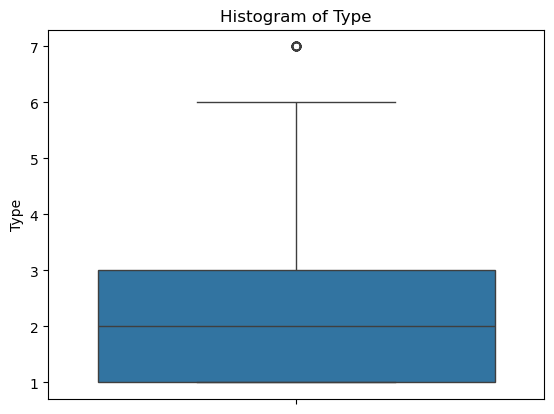

In [ ]:
# PLotting boxplot for all numerical columns
for i, column in enumerate(Data.columns):
    sns.boxplot(Data[column])
    plt.title(f'Histogram of {column}')
    plt.show()

# Histogram

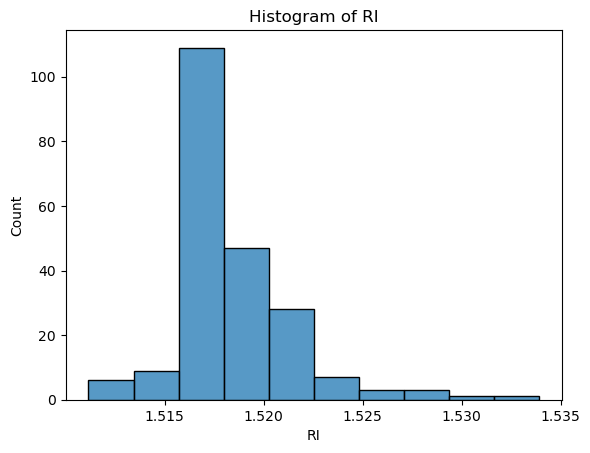

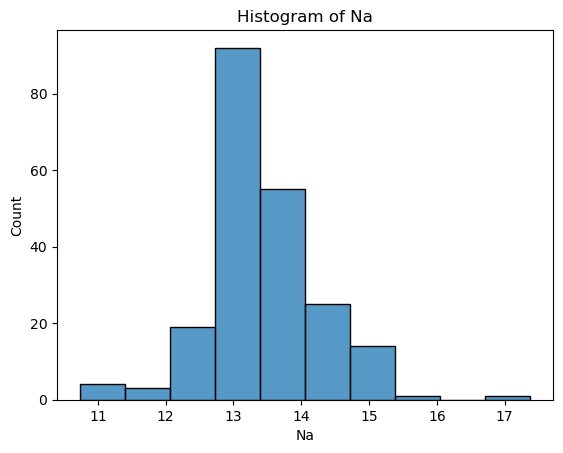

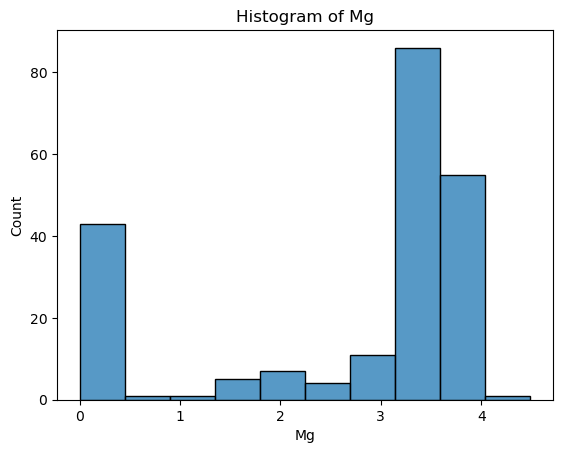

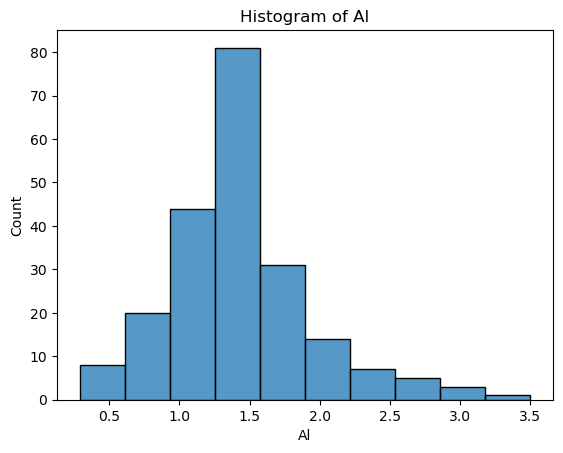

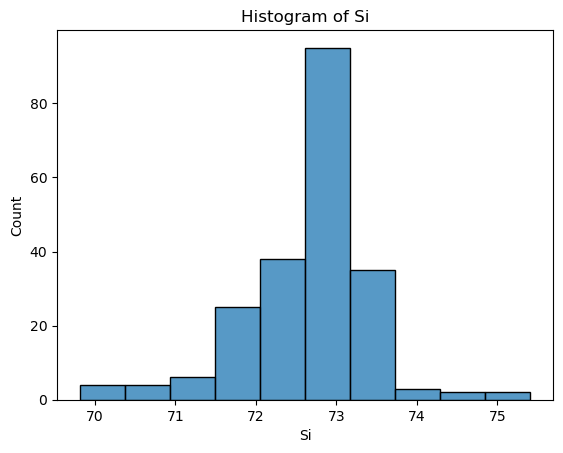

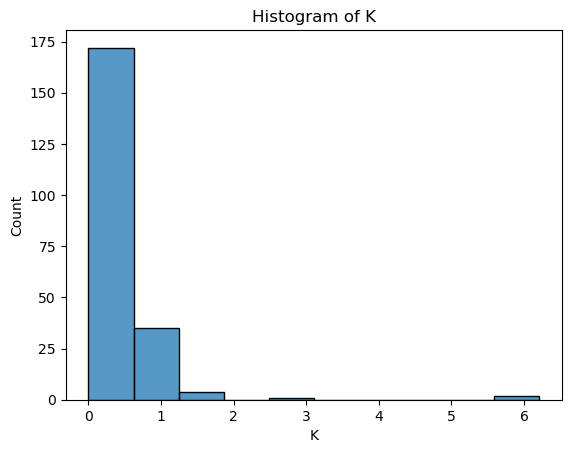

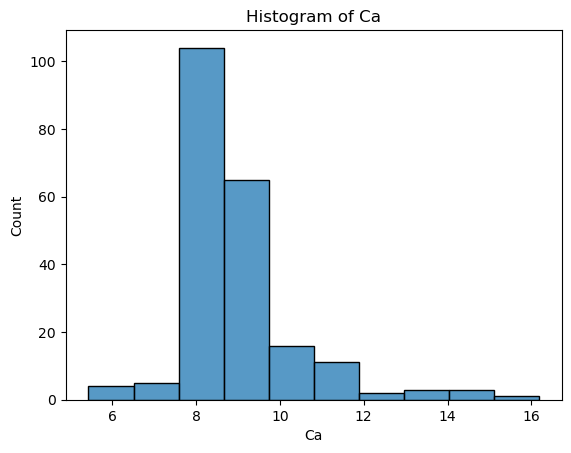

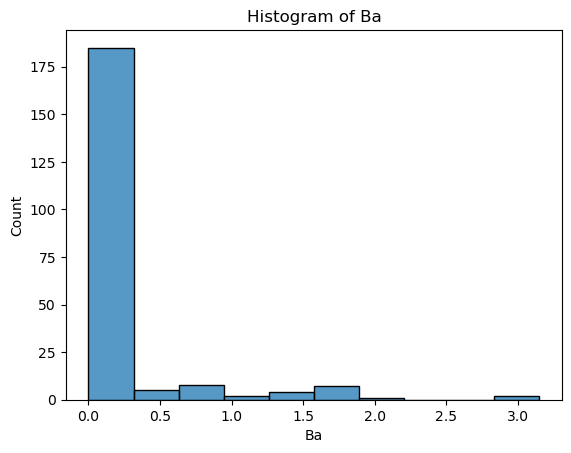

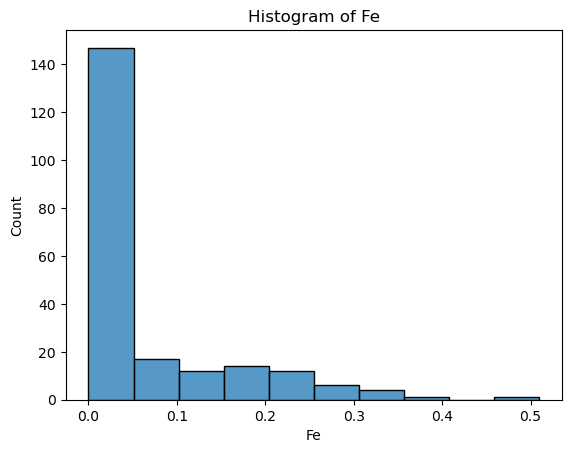

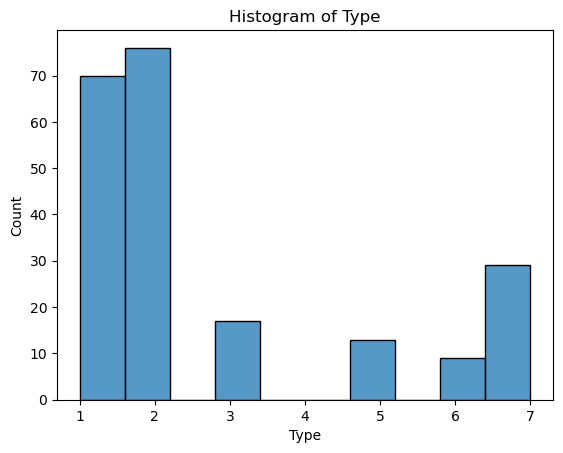

In [ ]:
# Plotting histogram for all columns
for i, column in enumerate(Data.columns):
    sns.histplot(Data[column],bins=10)
    plt.title(f'Histogram of {column}')
    plt.show()

# Countplot

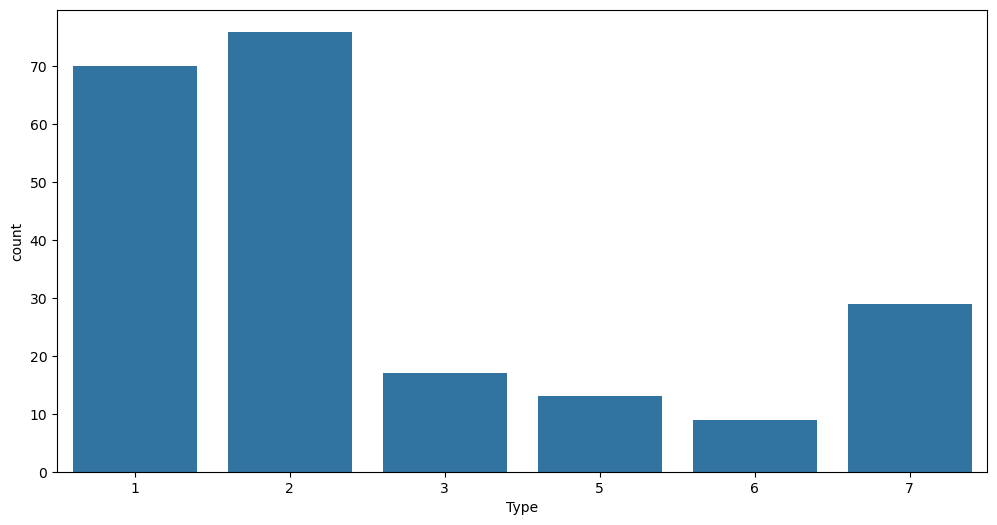

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=Data, x=Data['Type'])
plt.show()

In [ ]:
#correlation matrix
Data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


# Heatmap

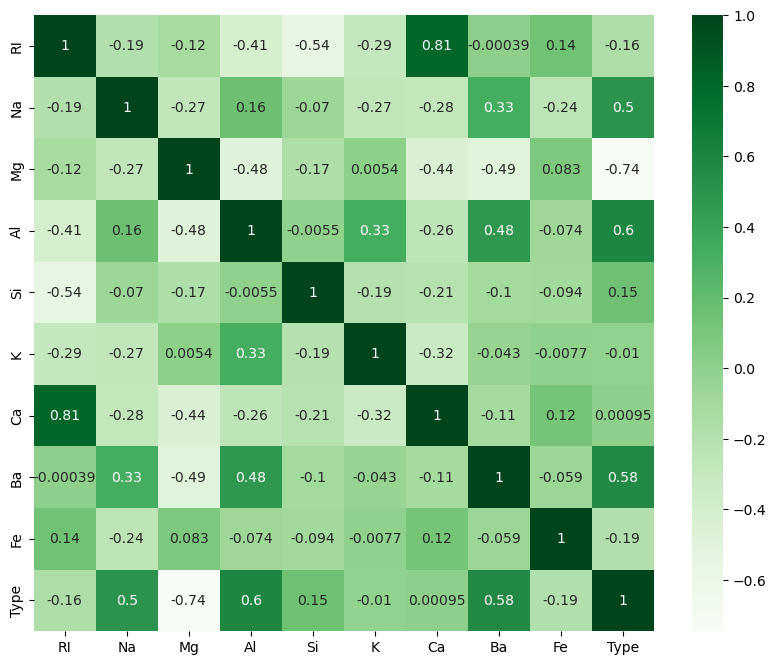

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(numeric_only=True), annot = True, cmap="Greens")
plt.show()

# Random Forest Model Implementation

In [ ]:
# split the data into x and y
x = Data.iloc[:,0:8]
y = Data['Type']

In [ ]:
#create the instance of the standardscaler
scale = StandardScaler()
x_scale = scale.fit_transform(x)


In [ ]:
# convert the scaled data back into a dataframe
x_scale_df = pd.DataFrame(x_scale, columns=x.columns)
x_scale_df

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877
...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087


In [ ]:
# split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x_scale_df,y,test_size=0.20,random_state=41)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((171, 8), (43, 8), (171,), (43,))

# Bagging and Boosting Methods

# Random Forest Classification

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


x = Data.iloc[:,0:8]
y = Data['Type']

num_trees = 100
max_features = 3 #Total features m=8, K=3 i.e. randomly select 3 features
kfold = KFold(n_splits=10)

#initialize the model
randomforest_Model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Results = cross_val_score(Model , x, y, cv=kfold)

In [ ]:
Results

array([0.45454545, 0.81818182, 0.59090909, 0.77272727, 0.28571429,
       0.66666667, 0.57142857, 0.04761905, 0.23809524, 0.95238095])

In [ ]:
print(Results.mean()*100)

53.98268398268399


In [ ]:
randomforest_Model.fit(x_train,y_train)         # fit the model
result_train = randomforest_Model.predict(x_train)

In [ ]:
result_train

array([2, 3, 1, 1, 7, 2, 1, 5, 1, 2, 7, 1, 2, 7, 1, 2, 5, 2, 2, 3, 1, 7,
       2, 7, 2, 1, 7, 7, 2, 1, 7, 2, 1, 5, 1, 2, 1, 2, 7, 7, 7, 3, 2, 2,
       1, 3, 5, 7, 6, 1, 1, 1, 2, 7, 3, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 5, 5, 7, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 6, 2, 2, 3, 1, 2, 2, 2, 2, 1, 1, 5, 2, 5, 2, 3, 5, 2, 1,
       6, 1, 1, 5, 2, 2, 7, 1, 2, 2, 2, 2, 2, 1, 1, 2, 7, 7, 3, 2, 1, 3,
       2, 7, 2, 1, 2, 2, 1, 1, 3, 7, 2, 1, 1, 1, 2, 2, 6, 6, 2, 2, 6, 2,
       7, 2, 2, 7, 6, 7, 2, 6, 2, 1, 3, 2, 1, 2, 2, 5, 7], dtype=int64)

In [ ]:
#confusion matrrix on training data
cofusionmatrix_train = confusion_matrix(y_train,result_train)
cofusionmatrix_train

array([[54,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 24]], dtype=int64)

In [ ]:
print(classification_report(y_train,result_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [ ]:
#testing data
result_test = randomforest_Model.predict(x_test)
confusionmatrix_test = confusion_matrix(y_test,result_test)
confusionmatrix_test

array([[15,  0,  1,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  1],
       [ 2,  0,  3,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  4]], dtype=int64)

In [ ]:
# Classification Report
print(classification_report(y_test,result_test))

              precision    recall  f1-score   support

           1       0.79      0.94      0.86        16
           2       0.79      0.79      0.79        14
           3       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.79        43
   macro avg       0.69      0.69      0.68        43
weighted avg       0.75      0.79      0.77        43



# AdaBoost Classification

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

Data=pd.read_excel('glass.xlsx', sheet_name='glass')
array = Data.values

x = Data.iloc[:,0:8]
y = Data['Type']

num_trees = 20
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
adaboost_Model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(adaboost_Model, x, y, cv=kfold)

In [ ]:
results

array([0.45454545, 0.63636364, 0.59090909, 0.5       , 0.38095238,
       0.38095238, 0.33333333, 0.19047619, 0.61904762, 0.52380952])

In [ ]:
print(results.mean()*100)

46.103896103896105


In [ ]:
adaboost_Model.fit(x_train,y_train)
result_train = adaboost_Model.predict(x_train)

In [ ]:
result_train

array([2, 2, 2, 2, 7, 2, 2, 5, 2, 2, 7, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 2, 7, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 2, 2, 2,
       2, 2, 2, 7, 3, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2,
       2, 7, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       7, 2, 2, 7, 3, 7, 2, 2, 2, 2, 3, 2, 2, 2, 2, 5, 7], dtype=int64)

In [ ]:
confusionmatrix_train = confusion_matrix(y_train,result_train) # on training
confusionmatrix_train

array([[ 0, 54,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0],
       [ 0, 11,  1,  0,  0,  0],
       [ 0,  8,  0,  3,  0,  0],
       [ 0,  4,  4,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 22]], dtype=int64)

In [ ]:
# Classification report
print(classification_report(y_train,result_train))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        54
           2       0.44      1.00      0.61        62
           3       0.20      0.08      0.12        12
           5       1.00      0.27      0.43        11
           6       0.00      0.00      0.00         8
           7       1.00      0.92      0.96        24

    accuracy                           0.51       171
   macro avg       0.44      0.38      0.35       171
weighted avg       0.38      0.51      0.39       171



In [ ]:
# testing dataset
result_test = adaboost_Model.predict(x_test)
confusionmatrix_test = confusion_matrix(y_test,result_test)
confusionmatrix_test

array([[ 0, 14,  1,  0,  0,  1],
       [ 0, 13,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  4]], dtype=int64)

In [ ]:
print(classification_report(y_test,result_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.36      0.93      0.52        14
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.40        43
   macro avg       0.19      0.29      0.22        43
weighted avg       0.21      0.40      0.26        43



# Additional Notes

1. Explain Bagging and Boosting methods. How is it different from each other.
   
  Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Bagging and Boosting are two types of Ensemble Learning.
  
Bagging: Multiple models (typically decision trees) are trained in parallel on different random subsets of the data (using bootstrap sampling). Their predictions are then averaged (for regression) or voted (for classification).Common Algorithm: Random Forest.

Boosting:Models are trained sequentially, where each new model focuses on correcting the errors made by the previous ones. The final prediction is a weighted combination of all models.Common Algorithm: AdaBoost, Gradient Boosting.

2. Explain how to handle imbalance in the data.
   
Handling imbalanced data is crucial for improving model performance in classification tasks. Here are common techniques:
Resampling Methods:

Oversampling: Increase the size of the minority class by duplicating samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

Undersampling: Reduce the size of the majority class by randomly removing samples.

Ensemble Methods-methods like Balanced Random Forest or EasyEnsemble, which combine resampling and ensemble learning.

Evaluation Metrics: Use appropriate metrics like Precision-Recall, F1-Score, ROC-AUC instead of accuracy to assess model performance on imbalanced data.